# Menganalisis risiko gagal bayar peminjam



Tujuan Proyek:

Tujuan dari proyek ini adalah untuk menganalisis pengaruh status perkawinan dan jumlah anak terhadap probabilitas gagal bayar peminjam dalam pelunasan pinjaman. Melalui analisis ini, kami ingin memberikan wawasan kepada divisi kredit bank untuk membantu mereka dalam membuat keputusan penilaian kredit yang lebih akurat.

Hipotesis:

Berdasarkan pemahaman awal terhadap risiko kredit, kami merumuskan hipotesis sebagai berikut:

Hipotesis 1: 
Apakah Peminjam yang belum menikah atau bercerai memiliki probabilitas gagal bayar yang lebih tinggi dibandingkan dengan peminjam yang sudah menikah atau memiliki status perkawinan yang stabil ?

Hipotesis 2: 
Apakah Jumlah anak yang dimiliki oleh seorang peminjam berpengaruh terhadap probabilitas gagal bayar? Kami mengasumsikan bahwa semakin banyak anak yang dimiliki oleh seorang peminjam, semakin tinggi kemungkinan mereka mengalami kesulitan dalam melunasi pinjaman.

Selanjutnya, kita akan melakukan analisis data untuk menguji hipotesis ini dan memberikan rekomendasi berdasarkan temuan kita.

## Buka file data dan baca informasi umumnya.



In [143]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




In [144]:
# Muat Datanya
data = pd.read_csv('/datasets/credit_scoring_eng.csv')

In [145]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


## Soal 1. Eksplorasi data

**Deskripsi data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - status perkawinan
- `family_status_id` - pengidentifikasi untuk status perkawinan nasabah
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah pernah melakukan gagal bayar pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman



In [146]:
# Mari kita lihat berapa banyak baris dan kolom yang dimiliki oleh dataset kita
print("Jumlah baris dan kolom dalam dataset:", data.shape)



Jumlah baris dan kolom dalam dataset: (21525, 12)


In [147]:
# Mari tampilkan N baris pertama
data.head(10)


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [149]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000



Yang Saya lihat dan perhatikan dalam sampel data yang di tampilkan. Terdapat beberapa masalah yang memerlukan penyelidikan dan perubahan lebih lanjut diantaranya yaitu :
1. days_employed banyak data yang minus
2. Terdapat beberapa data yang hilang di kolom days_employed dan total_income
3. terdapat data duplikat

In [150]:
# Dapatkan informasi data
data.isnull().sum()


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


Informasi yang terdapat pada data ada beberapa nilai yang hilang, yatu di kolom days_employed dan total_income.

In [151]:
# Mari kita lihat tabel yang telah difilter dengan nilai yang hilang di kolom pertama yang mengandung data yang hilang
data.loc[data['days_employed'].isnull()]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


Jika di perhatikan nilai yang hilang pada data terlihat simetris, di kolom days_employed nilai nya hilang ternyata di kolom total_income juga nilai nya hilang. Saya ingin melakukan penyelidikan lebih lanjut dan menghitung nilai yang hilang di semua baris dengan nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.

In [152]:
# Mari kita terapkan beberapa kondisi untuk memfilter data dan melihat jumlah baris dalam tabel yang telah difilter.

missing_data = data.loc[data['days_employed'].isnull()]


In [153]:
data.isnull().sum() / len(data) * 100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

**Kesimpulan sementara**


Kesimpulan sementara yang dapat saya simpulkan yaitu : 
1. Terdapat nilai yang minus di kolom days_employed.
2. Terdapat nilai yang hilang pada kolom days_employed dan total_income yaitu 2.174 baris nilai yang hilang dari 21.525 baris.
3. Terdapat nilai minus pada kolom children.  
4. Di kolom children ada nasabah yang memiliki anak sebanyak 20, dan anak -1.

Terdapat dua karakteristik yang kemungkinan dapat membuat nilai tersebut hilang diantaranya :
 1. Penyeb data tersebut hilang disebabkan karna nasabah tidak memiliki data tentang pengalaman kerja.
 2. Jika seorang nasabah tidak memiliki data tentang pengalaman kerja otomatis total pendapatan perbulan nya juga tidak ada.
 
 Langkah selanjutnya saya akan memperbaiki nilai yang minus pada kolom days_employed dan kolom children serta akan memperbaiki nilai yang hilang pada kolom days_employed dan total_income.

In [154]:
# Mari kita periksa nasabah yang tidak memiliki data tentang karakteristik yang teridentifikasi dan kolom dengan nilai yang hilang
data_null = data[ (data['days_employed'].isnull()) | (data['total_income'].isnull())].reset_index(drop=True)

In [155]:
print("Jumlah baris dalam dataset yang hilang:", data_null.shape)


Jumlah baris dalam dataset yang hilang: (2174, 12)


In [156]:
data_null.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
1,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
2,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
3,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
4,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding


In [157]:
# Periksalah distribusinya
data_null['education'].value_counts(normalize=True) *100

secondary education    64.765409
bachelor's degree      22.815087
SECONDARY EDUCATION     3.081877
Secondary Education     2.989880
some college            2.529899
Bachelor's Degree       1.149954
BACHELOR'S DEGREE       1.057958
primary education       0.873965
Some College            0.321987
SOME COLLEGE            0.321987
PRIMARY EDUCATION       0.045998
Primary Education       0.045998
Name: education, dtype: float64

In [158]:
data_null['income_type'].value_counts(normalize=True) *100

employee         50.827967
business         23.367065
retiree          18.997240
civil servant     6.761730
entrepreneur      0.045998
Name: income_type, dtype: float64

In [159]:
data_null['debt'].value_counts(normalize=True) *100

0    92.180313
1     7.819687
Name: debt, dtype: float64

In [160]:
data_null['family_status'].value_counts(normalize=True) *100

married              56.899724
civil partnership    20.331187
unmarried            13.247470
divorced              5.151794
widow / widower       4.369825
Name: family_status, dtype: float64

In [161]:
data_null['children'].value_counts(normalize=True) *100

 0     66.191352
 1     21.849126
 2      9.383625
 3      1.655934
 20     0.413983
 4      0.321987
-1      0.137994
 5      0.045998
Name: children, dtype: float64

In [162]:
data_null['purpose'].value_counts(normalize=True) *100

having a wedding                            4.231831
to have a wedding                           3.725851
wedding ceremony                            3.495860
construction of own property                3.449862
housing transactions                        3.403864
buy real estate                             3.311868
purchase of the house for my family         3.265869
transactions with my real estate            3.265869
transactions with commercial real estate    3.219871
housing renovation                          3.219871
buy commercial real estate                  3.081877
buying property for renting out             2.989880
property                                    2.851886
buy residential real estate                 2.805888
real estate transactions                    2.805888
housing                                     2.759890
building a property                         2.713891
cars                                        2.621895
going to university                         2.


Berikut temuan saya dalam data : 
1. berdasarkan kolom education, secondary education merupakan paling banyak data hilang nya yaitu 64.765409% dari data yang hilang di days_employed & total_income.
2. berdasarkan kolom income_type, employee data yang hilang nya paling banyak yaitu 50.827967% dari data yang hilang di days_employed & total_income.
3. berdasarkan kolom debt, nasabah yang belum pernah gagal bayar nilai yang hilany nya paling banyak yaitu 92.180313% dari data yang hilang di days_employed & total_income.
4. berdasarkan kolom family_status, married data yg hilang nya paling banyak yaitu 56.899724% dari data yang hilang di days_employed & total_income.
5. berdasarkan kolom children, yang tidak memiliki anak data yang hilang nya paling banyak yaitu 66.191352% dari data yang hilang di days_employed & total_income.
6. berdasarkan kolom purpose, having a wedding  adalah data yang hilang paling banyak yaitu 4.231831% dari data yang hilang di days_employed & total_income.

**Kemungkinan penyebab hilangnya nilai dalam data**


Penyeb data tersebut hilang kemungkinan besar disebabkan karna nasabah tidak memiliki data tentang pengalaman kerja.

Jika seorang nasabah tidak memiliki data tentang pengalaman kerja otomatis total pendapatan perbulan nya juga tidak ada.


In [163]:
# Memeriksa distribusi di seluruh dataset
data['income_type'].value_counts()


employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [164]:
data['family_status'].value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [165]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [166]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [167]:
data['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [168]:
data['purpose'].value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
purchase of my own house                    620
building a property                         620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

**Kesimpulan sementara**

Kita tidak dapat menghapus nilai yang hilang, karena distribusi nilai yang hilang sangat banyak. Artinya kita harus mengisi nilai yang hilang dengan mean atau median nanti nya.



In [169]:
# Periksa penyebab dan pola lain yang dapat mengakibatkan nilai yang hilang
data_null[data_null['income_type']=='employee']['children'].value_counts()


 0     651
 1     279
 2     137
 3      29
 4       4
 20      3
 5       1
-1       1
Name: children, dtype: int64

In [170]:
data_null[data_null['income_type']=='employee']['family_status'].value_counts()


married              653
civil partnership    225
unmarried            144
divorced              57
widow / widower       26
Name: family_status, dtype: int64

In [171]:
data_null[data_null['income_type']=='employee']['debt'].value_counts()


0    1007
1      98
Name: debt, dtype: int64

In [172]:
data_null[data_null['income_type']=='employee']['education'].value_counts()


secondary education    754
bachelor's degree      210
SECONDARY EDUCATION     35
Secondary Education     31
some college            28
Bachelor's Degree       13
BACHELOR'S DEGREE       13
primary education       11
SOME COLLEGE             5
Some College             4
PRIMARY EDUCATION        1
Name: education, dtype: int64

In [173]:
data_null[data_null['income_type']=='employee']['purpose'].value_counts()


to have a wedding                           44
having a wedding                            43
housing transactions                        42
buying property for renting out             42
buy real estate                             41
second-hand car purchase                    38
construction of own property                36
buy commercial real estate                  35
transactions with commercial real estate    35
housing renovation                          35
transactions with my real estate            35
wedding ceremony                            34
property                                    33
purchase of the house for my family         31
housing                                     31
getting an education                        31
real estate transactions                    30
buy residential real estate                 30
to become educated                          29
buying my own car                           28
purchase of the house                       28
building a pr

**Kesimpulan sementara**

Kemungkinan hilang nya data di kolom days_employed dan total_income tidak lah kebetulan, karna terdapat beberapa pola.


In [174]:
# Periksa pola lainnya - jelaskan pola tersebut
data_null['children'].value_counts(normalize=True)

 0     0.661914
 1     0.218491
 2     0.093836
 3     0.016559
 20    0.004140
 4     0.003220
-1     0.001380
 5     0.000460
Name: children, dtype: float64

In [175]:
data_null['education_id'].value_counts(normalize=True)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

**Kesimpulan**


yang saya pahami terdapat pola sebagai berikut.
Data yang hilang di kolom income_type nasabah yang tipe pendapatan nya employee :
1. Pada kolom children nasabah yang belum memiliki anak data yang hilang nya paling banyak yaitu 651.
2. Pada kolom family_status nasabah yang married data yang hilang nya paling banyak yaitu 653. 
3. Pada kolom debt nasabah yang belum pernah gagal bayar data yang hilang nya paling banyak yaitu 1007. 
4. Pada kolom education nasabah yang pendidikan nya secondary education data yang hilang nya paling banyak yaitu 754. 
5. Pada kolom purpose nasabah yang melakukan pinjaman to have a wedding data yang hilang nya paling banyak yaitu 44. 
Dalam pola data di atas Ini mungkin menunjukkan bahwa sebagian besar nasabah tersebut belum melengkapi informasi tentang pengalaman kerja dan total pendapatan mereka.


Saya akan mengatasi nilai yang hilang pada kolom days_employed dan total_income ini dengan cara mengisi nilai yang kosong tersebut dengan Menggunakan mean atau median.



Langkah selanjutnya untuk mentransformasi data saya akan memperbaiki nilai-nilai duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.

## Transformasi data



In [176]:
# Mari kita lihat semua nilai di kolom pendidikan untuk memeriksa ejaan apa yang perlu diperbaiki
data['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [177]:
# Perbaiki pencatatan jika diperlukan
data['education'] = data['education'].str.lower()

In [178]:
# Periksa semua nilai di kolom untuk memastikan bahwa kita telah memperbaikinya dengan tepat
data['education'].value_counts()


secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [179]:
# Mari kita lihat distribusi nilai pada kolom `children`
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

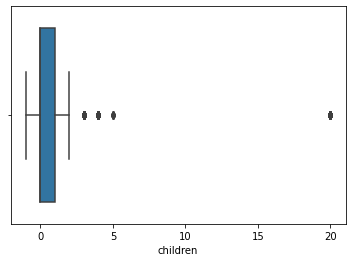

In [180]:
sns.boxplot(data['children']);


Dalam kolom education terdapat data duplikat dikarnakan ejaan tulisan tersebut ada yg menggunakan hurup kecil dan ada yang menggunakan huruf besar yang sebenar nya jenis pendidikan tersebut sama saja.
Sedangkan dalam kolom children ini terdapat hal yang aneh yaitu jumlah anak 20 orang dalam satu keluarga dan jumlah anak - 1 dalam suatu keluarga. 20 anak dalam satu keluarga merupakan hal yang aneh untuk jaman sekarang yang seperti nya jarang sekali hal tersebut terjadi, atau bahkan tidak mungkin terjadi. jumlah anak -1 dalam suatu keluarga itu juga hal yang mustahil, bagai mana perhitungan nya sehingga jumlah anak pada suatu keluarga itu minus.
Hal tersebut bisa saja terjadi mungkin saja di karnakan salah input data.
Saya akan membuat 20 anak itu menjadi 2 anak dan -1 anak itu akan saya ubah jadi 1 anak, hal ini mungkin lebih masuk akal.

In [181]:
# [perbaiki data berdasarkan keputusanmu]
data['children'] = data['children'].replace(-1, 1,)

In [182]:
data['children'] = data['children'].replace(20, 2,)

In [183]:
# Periksa kembali kolom `children` untuk memastikan bahwa semuanya telah diperbaiki
data['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [184]:
# Temukan data yang bermasalah di kolom `days_employed` jika memang terdapat masalah dan hitung persentasenya
data['days_employed'].value_counts()

-327.685916     1
-1580.622577    1
-4122.460569    1
-2828.237691    1
-2636.090517    1
               ..
-7120.517564    1
-2146.884040    1
-881.454684     1
-794.666350     1
-3382.113891    1
Name: days_employed, Length: 19351, dtype: int64

Jumlah data yang bermasalah sangat tinggi di kolom days_employed ini. Ada beberapa data yang tidak masuk akal di days_employed yaitu terdapat nilai minus dan tidak mungkin seseorang memiliki pengalaman kerja sampai ratusan tahun.
seorang nasabah pasti mulai kerja di umur 18 tahun dan maksimal pensiun di usia 70 tahun.

In [185]:
# Atasi nilai yang bermasalah, jika ada
data['days_employed'] = data['days_employed'].abs()


In [186]:
data['days_employed'].value_counts()

142.276217       1
1849.622944      1
886.253127       1
2539.534295      1
390574.985524    1
                ..
1394.302246      1
2325.720832      1
4086.407828      1
1259.497032      1
1636.419775      1
Name: days_employed, Length: 19351, dtype: int64

In [187]:
data[data['days_employed'] < 70 ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
180,0,60.637328,37,secondary education,1,civil partnership,1,F,employee,0,33961.154,to have a wedding
368,1,61.518457,31,secondary education,1,unmarried,4,F,employee,0,10253.750,property
684,1,61.596443,29,secondary education,1,married,0,F,employee,0,20146.658,purchase of the house
1553,0,51.496885,21,some college,2,unmarried,4,F,employee,0,15671.577,purchase of the house
2127,1,34.701045,31,bachelor's degree,0,married,0,F,business,0,14489.279,getting an education
2375,0,55.475648,44,secondary education,1,married,0,F,business,0,26989.219,buying my own car
3235,0,50.128298,43,secondary education,1,civil partnership,1,F,business,0,15901.112,having a wedding
4603,1,55.838006,31,bachelor's degree,0,unmarried,4,M,employee,0,21810.843,buy commercial real estate
5287,1,37.726602,36,secondary education,1,married,0,F,employee,0,10392.730,transactions with my real estate
6157,2,30.195337,47,secondary education,1,civil partnership,1,M,business,0,37033.790,wedding ceremony


In [188]:
data['years_employed'] = data['days_employed'] / 365

In [189]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814


In [190]:
# Periksa `dob_years` untuk nilai yang mencurigakan dan hitung persentasenya
sorted(data['dob_years'].unique())


[0,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]


Dalam dob_years terdapat usia nasabah 0 tahun.

Langkah yang akan saya lakukan yaitu  membuat subset dari DataFrame 'data' yang hanya berisi baris-baris dengan usia nasabah (kolom 'dob_years') yang bukan 0, dan kemudian mengatur ulang indeks subset tersebut untuk memastikan indeks yang lebih teratur.

In [191]:
# Atasi masalah pada kolom `dob_years`, jika terdapat masalah
data_new = data[data['dob_years']!=0].reset_index(drop=True)

In [192]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
sorted(data_new['dob_years'].unique())

[19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75]

In [193]:
# Mari kita lihat nilai untuk kolom ini
data_new['family_status'].value_counts()


married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

In [196]:
# Mari kita liat nilai dalam kolom ini
data_new['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [197]:
drop_index = data_new[data_new['gender']=='XNA'].index

In [198]:
# Atasi nilai-nilai yang bermasalah, jika ada
data_new_2 = data_new.drop(drop_index).reset_index(drop=True)

In [199]:
# Periksa hasilnya - pastikan bahwa masalahnya telah diperbaiki
data_new_2['gender'].value_counts()


F    14164
M     7259
Name: gender, dtype: int64

In [200]:
# Mari kita lihat nilai dalam kolom ini
data_new_2['income_type'].value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
entrepreneur                       2
unemployed                         2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64

In [203]:
# Periksa duplikat
data_new_2.duplicated().sum()


71

In [204]:
# Atasi duplikat, jika ada
data_new_3 = data_new_2.drop_duplicates().reset_index(drop=True)

In [205]:
# Lakukan pemeriksaan terakhir untuk mengecek apakah kita memiliki duplikat
data_new_3.duplicated().sum()

0

In [206]:
# Periksa ukuran dataset yang sekarang kamu miliki setelah manipulasi pertama yang kamu lakukan
data_new_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21352 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21352 non-null  int64  
 3   education         21352 non-null  object 
 4   education_id      21352 non-null  int64  
 5   family_status     21352 non-null  object 
 6   family_status_id  21352 non-null  int64  
 7   gender            21352 non-null  object 
 8   income_type       21352 non-null  object 
 9   debt              21352 non-null  int64  
 10  total_income      19259 non-null  float64
 11  purpose           21352 non-null  object 
 12  years_employed    19259 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB



Dalam dataset baru yang telah saya ubah di atas, perubahan-perubahan yang terjadi yaitu :
1. Di kolom education saya buat teks di dalam kolom tersebut menjadi huruf kecil semua.
2. Di kolom children mengubah jumlah anak -1 menjadi 1 dan mengubah jumlah anak 20 menjadi 2.
3. Di kolom days_employed mengubah nilai minus menjadi normal, dan membuat nilai tersebut menjadi perhitungan tahun yang di simpan di kolom baru yaitu kolom years_employed.
4. Di kolom dob_years menghilangkan usia nasabah 0 tahun.
5. Di kolom gender menghilangkan jenis kelamin XNA.
6. Menghilangkan data duplikat pada data sebelumnya.


# Bekerja dengan nilai yang hilang

In [207]:
# Temukan dictionary
dict_edu = data_new_3[['education_id', 'education']].drop_duplicates().reset_index(drop=True)

In [208]:
dict_edu.to_dict(orient='records')

[{'education_id': 0, 'education': "bachelor's degree"},
 {'education_id': 1, 'education': 'secondary education'},
 {'education_id': 2, 'education': 'some college'},
 {'education_id': 3, 'education': 'primary education'},
 {'education_id': 4, 'education': 'graduate degree'}]

In [209]:
dict_family = data_new_3[['family_status_id', 'family_status']].drop_duplicates().reset_index(drop=True)

In [210]:
dict_family.to_dict(orient='records')

[{'family_status_id': 0, 'family_status': 'married'},
 {'family_status_id': 1, 'family_status': 'civil partnership'},
 {'family_status_id': 2, 'family_status': 'widow / widower'},
 {'family_status_id': 3, 'family_status': 'divorced'},
 {'family_status_id': 4, 'family_status': 'unmarried'}]

### Memperbaiki nilai yang hilang di `total_income`



Kolom yang terdapat nilai yang hilang yaitu days_employed dan total_income. saya akan mengisi nya dengan mean atau median.



In [211]:
# Mari kita tulis sebuah fungsi untuk menghitung kategori usia

def age_group(age):
    try:
        if age <= 10:
            return 'Anak Anak'
        elif 11 <= age <= 17:
            return 'Remaja'
        elif 18 <= age <= 30:
            return 'Muda'
        elif 31 <= age <= 50:
            return 'Dewasa'
        else:
            return 'Lansia'
    except:
        return 'Not Known' 

In [212]:
# Lakukan pengujian untuk melihat apakah fungsimu bekerja atau tidak
age_group(23)

'Muda'

In [213]:
# Buatlah kolom baru berdasarkan fungsi

data_new_3['age_category'] = data['dob_years'].apply(age_group)

In [214]:
data_new_3

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Lansia
21348,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,Dewasa
21349,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Lansia
21350,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Muda


In [215]:
# Periksa bagaimana nilai di dalam kolom baru
data_new_3['age_category'].value_counts()


Dewasa       10930
Lansia        6628
Muda          3693
Anak Anak      101
Name: age_category, dtype: int64

In [216]:
# Buat tabel tanpa nilai yang hilang dan tampilkan beberapa barisnya untuk memastikan semuanya berjalan dengan baik
data_notnull = data_new_3[data_new_3['total_income'].notnull() ].reset_index(drop=True)
data_notnull.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Lansia


In [217]:
# Perhatikan nilai rata-rata untuk pendapatan berdasarkan faktor yang telah kamu identifikasi
data_notnull.groupby('age_category')['total_income'].mean()

age_category
Anak Anak    24574.841947
Dewasa       26805.587194
Lansia       26716.390214
Muda         26962.804919
Name: total_income, dtype: float64

In [218]:
# Perhatikan nilai median untuk pendapatan berdasarkan faktor yang telah kamu identifikasi
age_income = pd.pivot_table(data_notnull, index='age_category', values='total_income', aggfunc='median').reset_index()


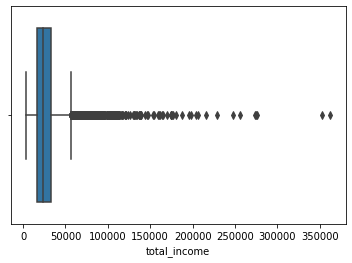

In [219]:
sns.boxplot(data_new_3['total_income']);

In [220]:
age_income

,age_category,total_income
0,Anak Anak,21437.010
1,Dewasa,23165.348
2,Lansia,23220.936
3,Muda,23328.508


In [221]:
#  Tulis fungsi yang akan kita gunakan untuk mengisi nilai yang hilang
def replace_income(dataset, grouping):
    for group in grouping['age_category']:
        index = 0
        dataset.loc[(dataset['age_category']==group) & (dataset['total_income'].isnull()), 'total_income'] = grouping.iloc[index, 1]
        index = index + 1
    return dataset

In [222]:
# Memeriksa bagaimana nilai di dalam kolom baru
data_new_3['total_income'].median()

23200.877

In [223]:
# Terapkan fungsi tersebut ke setiap baris
data_new_3.groupby('income_type')['total_income'].median()

income_type
business                       27563.0285
civil servant                  24083.5065
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [224]:
# Periksa apakah kita mendapatkan kesalahan
data_new_3[data_new_3['days_employed'].isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,NaN,Lansia
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,NaN,Dewasa
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,NaN,Lansia
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,NaN,Dewasa
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,NaN,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car,NaN,Dewasa
21322,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,NaN,Dewasa
21324,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property,NaN,Dewasa
21329,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,NaN,Dewasa


In [225]:
# Ganti nilai yang hilang jika terdapat kesalahan
data_new_4 = replace_income(dataset=data_new_3, grouping=age_income)

In [226]:
# Periksa jumlah entri di kolom
data_new_4.isnull().sum()


children               0
days_employed       2093
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      2093
age_category           0
dtype: int64

###  Memperbaiki nilai di `days_employed`

In [227]:
# Distribusi median dari `days_employed` berdasarkan parameter yang kamu identifikasi

pd.pivot_table(data, columns='income_type', values='days_employed', aggfunc='median')


income_type,business,civil servant,employee,entrepreneur,paternity / maternity leave,retiree,student,unemployed
days_employed,1547.382223,2689.368353,1574.202821,520.848083,3296.759962,365213.306266,578.751554,366413.652744


In [228]:
# Distribusi rata-rata dari `days_employed` berdasarkan parameter yang kamu identifikasi
pd.pivot_table(data, columns='income_type', values='days_employed', aggfunc='mean')

income_type,business,civil servant,employee,entrepreneur,paternity / maternity leave,retiree,student,unemployed
days_employed,2111.524398,3399.896902,2326.499216,520.848083,3296.759962,365003.491245,578.751554,366413.652744



Dalam hal ini saya akan menggunakan Median untuk memperbaiki nilai yang hilang di kolom days_employed. karena Median tidak terpengaruh oleh outlier seperti halnya mean. Jika ada outlier yang ekstrem dalam dataset, menggunakan rata-rata untuk mengisi nilai yang hilang bisa mengakibatkan hasil yang bias. Di sisi lain, median hanya terpengaruh oleh nilai tengah, sehingga lebih stabil terhadap nilai-nilai ekstrem.

In [229]:
# Mari tulis fungsi yang menghitung rata-rata atau median (tergantung keputusanmu) berdasarkan parameter yang kamu identifikasi
def fillna_from_median_group (dataset, col_missing, col_group):
    median = pd.pivot_table(dataset, columns=col_group, values=col_missing, aggfunc='median')

    for column in median.columns:
        dataset.loc[(data_new_4[col_group]==column) & (dataset[col_missing].isnull()), col_missing] = median[column][0]

    return dataset

In [230]:
# Periksa apakah fungsimu bekerja
fillna_from_median_group

<function __main__.fillna_from_median_group(dataset, col_missing, col_group)>

In [231]:
# Terapkan fungsi ke income_type
data_new_4 = fillna_from_median_group(data_new_4, col_missing='days_employed', col_group='income_type')


In [232]:
# Periksa apakah fungsimu bekerja
data_new_4

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,age_category
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912,Dewasa
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860,Dewasa
2,0,5623.422610,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637,Dewasa
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677,Dewasa
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814,Lansia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.409087,Lansia
21348,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.294258,Dewasa
21349,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789991,Lansia
21350,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.527347,Muda


In [233]:
# Ganti nilai yang hilang
data_new_4 = replace_income(dataset=data_new_4, grouping=age_income)


In [234]:
# Periksa entri di semua kolom - pastikan kita memperbaiki semua nilai yang hilang
data_new_4.isnull().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed      2093
age_category           0
dtype: int64

## Pengkategorian data



In [235]:
# Tampilkan nilai data yang kamu pilih untuk pengkategorian
data_new_4['total_income'].describe()


count     21352.000000
mean      26269.008604
std       15745.828655
min        3306.762000
25%       17223.821250
50%       21726.777500
75%       31321.653000
max      362496.645000
Name: total_income, dtype: float64

In [236]:
# Periksa nilai unik
data_new_4['purpose'].value_counts()

wedding ceremony                            786
having a wedding                            764
to have a wedding                           760
real estate transactions                    672
buy commercial real estate                  658
buying property for renting out             649
transactions with commercial real estate    648
housing transactions                        646
purchase of the house                       640
housing                                     640
purchase of the house for my family         637
construction of own property                633
property                                    629
transactions with my real estate            627
building a real estate                      621
purchase of my own house                    619
building a property                         619
buy real estate                             617
housing renovation                          605
buy residential real estate                 603
buying my own car                       



kelompok utama yang saya identifikasi berdasarkan nilai unik nya yaitu 'car', 'real estate', 'wedding' & 'education'.




In [237]:
# Mari kita tulis sebuah fungsi untuk mengategorikan data berdasarkan topik umum
def categorize_purpose(row):
    if 'car' in row:
        return 'car'
    elif 'hous' in row or 'prop' in row or 'real est' in row:
        return 'real estate'
    elif 'wedd' in row:
        return 'wedding'
    elif 'educ' in row or 'uni' in row:
        return 'education'
    else:
        return 'Not Known'

In [238]:
# Buat kolom yang memuat kategori dan hitung nilainya
data_new_4['purpose_category'] = data_new_4['purpose'].apply(categorize_purpose)


In [239]:
# Lihat semua data numerik di kolom yang kamu pilih untuk pengkategorian
data_new_4['total_income'].value_counts()

21437.010    2094
31791.384       2
17312.717       2
42413.096       2
15447.301       1
             ... 
40299.382       1
10000.392       1
99284.696       1
6264.532        1
41428.916       1
Name: total_income, Length: 19256, dtype: int64

In [240]:
# Dapatkan kesimpulan statistik untuk kolomnya
data_new_4['total_income'].describe()


count     21352.000000
mean      26269.008604
std       15745.828655
min        3306.762000
25%       17223.821250
50%       21726.777500
75%       31321.653000
max      362496.645000
Name: total_income, dtype: float64


Rentang yang akan saya gunakan untuk pengelompokan data numrik yaitu 'small', 'average' 'above average', 'hight' & 'very hight'.
Alasan nya karna menggunakan rentang tersebut lebih mudah di pahami dan lebih menggambarkan penghasilan nasabah dari yang rendah sampai yang paling besar.

In [241]:
# Buat fungsi yang melakukan pengkategorian menjadi kelompok numerik yang berbeda berdasarkan rentang
def income_level(income):
    if (income > 1000) and (income <= 10000):
        return 'small'
    if (income > 10000) and (income <= 20000):
        return 'avarage'
    if (income > 20000) and (income <= 30000):
        return 'above avarage'
    if (income > 30000) and (income <= 50000):
        return 'hight'
    if income > 50000:
        return 'very hight'
    


In [242]:
# Buat kolom yang memuat kategori
data_new_4['income_level'] = data_new_4['total_income'].apply(income_level)

In [243]:
# Hitung setiap nilai kategori untuk melihat pendistribusiannya
data_new_4['income_level'].head()

0            hight
1          avarage
2    above avarage
3            hight
4    above avarage
Name: income_level, dtype: object

In [244]:
income_level(39000)

'hight'

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman?**

In [245]:
# Periksa data anak dan data gagal bayar pinjaman
children_debt = pd.pivot_table(data_new_4, index='children', columns='debt', values='education', aggfunc='count').fillna(0).reset_index()

# Hitung persentase gagal bayar berdasarkan jumlah anak
children_debt['total'] = children_debt[0] + children_debt[1]
children_debt['percent 0'] = round(children_debt[0] / children_debt['total'] * 100, 1).astype(str) + '%'
children_debt['percent 1'] = round(children_debt[1] / children_debt['total'] * 100, 1).astype(str) + '%'
children_debt.sort_values('percent 1', ascending=False)

debt,children,0,1,total,percent 0,percent 1
4,4,37.0,4.0,41.0,90.2%,9.8%
2,2,1912.0,202.0,2114.0,90.4%,9.6%
1,1,4397.0,442.0,4839.0,90.9%,9.1%
3,3,301.0,27.0,328.0,91.8%,8.2%
0,0,12963.0,1058.0,14021.0,92.5%,7.5%
5,5,9.0,0.0,9.0,100.0%,0.0%


**Kesimpulan**

Kita tidak bisa mengatakan semakin banyak anak semakin besar probabilitas gagal bayar, karna berdasarkan data nasabah yang memiliki anak 5 dia tidak pernah gagal bayar.

Kita juga tidak bisa mengatakan semakin rendah jumlah anak akan semakin besar probabilitas gagal bayar nya, karna berdasarkan data nasabah yang tidak memiliki anak gagal bayar nya ada di angka 7.5%.

Dalam data tersebut memperlihatkan bahwa nasabah yang memiliki anak 4 dia memiliki probabilitas gagal bayar paling tinggi yaitu 9.8%.

Artinya tidak ada korelasi antara memiliki anak dengan probabilitas melakukan gagal bayar pinjaman.


**Apakah terdapat korelasi antara status keluarga dengan probabilitas melakukan gagal bayar pinjaman?**

In [246]:
# Periksa data status keluarga dan data gagal bayar pinjaman

family_status_debt = pd.pivot_table(data_new_4, index='family_status', columns='debt', values='education', aggfunc='count').fillna(0).reset_index()

# Hitung persentase gagal bayar berdasarkan status keluarga
family_status_debt['total'] = family_status_debt[0] + family_status_debt[1]
family_status_debt['percent 0'] = round(family_status_debt[0] / family_status_debt['total'] * 100, 1).astype(str) + '%'
family_status_debt['percent 1'] = round(family_status_debt[1] / family_status_debt['total'] * 100, 1).astype(str) + '%'
family_status_debt.sort_values('percent 1', ascending=False)


debt,family_status,0,1,total,percent 0,percent 1
3,unmarried,2521,273,2794,90.2%,9.8%
0,civil partnership,3743,386,4129,90.7%,9.3%
2,married,11363,927,12290,92.5%,7.5%
1,divorced,1100,85,1185,92.8%,7.2%
4,widow / widower,892,62,954,93.5%,6.5%


**Kesimpulan**

Berdasarkan data setatus keluarga, nasabah yang belum menikah mempunyai probabilitas gagal bayar lebih tinggi yaitu dengan nilai 9.8% gagal bayar. sedangkan janda / duda mempunyai probabilitas gagal bayar paling sedikit yaitu 6.5%. Dan yang setatus keluarga nya sudah menikah berada di nilai 7.5%.

Artinya, nasabah yang belum menikah lebih rentan akan gagal bayar dibandingkan dengan status keluarga yang lain. 


**Apakah terdapat korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman?**

In [247]:
# Periksa data tingkat pendapatan dan data gagal bayar pinjaman
income_level_debt = pd.pivot_table(data_new_4, index='income_level', columns='debt', values='education', aggfunc='count').fillna(0).reset_index()


# Hitung persentase gagal bayar berdasarkan tingkat pendapatan
income_level_debt['total'] = income_level_debt[0] + income_level_debt[1]
income_level_debt['percent 0'] = round(income_level_debt[0] / income_level_debt['total'] * 100, 1).astype(str) + '%'
income_level_debt['percent 1'] = round(income_level_debt[1] / income_level_debt['total'] * 100, 1).astype(str) + '%'
income_level_debt.sort_values('percent 1', ascending=False)



debt,income_level,0,1,total,percent 0,percent 1
0,above avarage,7438,693,8131,91.5%,8.5%
1,avarage,5864,547,6411,91.5%,8.5%
2,hight,4228,343,4571,92.5%,7.5%
4,very hight,1226,92,1318,93.0%,7.0%
3,small,863,58,921,93.7%,6.3%


**Kesimpulan**

Dalam tingkat pendapatan nasabah, ternyata nasabah yang pendapatan nya kecil lebih rendah probabilitas gagal bayar nya dibanding tingkat pendapatan rata tara ke atas. justru nasabah dengan pendapatan di atas rata rata lah yang lebih tinggi probabilitas gagal bayar nya. Tingkat pendapatan yang sangat tinggi justru hanya berbeda 0.7% dengan yang tingkat pendapatan nya kecil.

Artinya, korelasi antara tingkat pendapatan dengan probabilitas melakukan gagal bayar pinjaman itu tidak terlalu berpengaruh.


**Bagaimana tujuan kredit memengaruhi persentase gagal bayar?**

In [248]:
# Periksa persentase tingkat gagal bayar untuk setiap tujuan kredit dan lakukan penganalisisan
purpose_category_debt = pd.pivot_table(data_new_4, index='purpose_category', columns='debt', values='education', aggfunc='count').fillna(0).reset_index() 

purpose_category_debt['total'] = purpose_category_debt[0] + purpose_category_debt[1]
purpose_category_debt['percent 0'] = round(purpose_category_debt[0] / purpose_category_debt['total'] * 100, 1).astype(str) + '%'
purpose_category_debt['percent 1'] = round(purpose_category_debt[1] / purpose_category_debt['total'] * 100, 1).astype(str) + '%'
purpose_category_debt.sort_values('percent 1', ascending=False)


debt,purpose_category,0,1,total,percent 0,percent 1
0,car,3884,400,4284,90.7%,9.3%
1,education,3625,370,3995,90.7%,9.3%
3,wedding,2126,184,2310,92.0%,8.0%
2,real estate,9984,779,10763,92.8%,7.2%


**Kesimpulan**


Ternyata tujuan pinjaman untuk mobil dan pendidikan itu seimbang presentase gagal bayar nya yaitu di angka 9.3% dan lebih tinggi probabilitas gagal bayar pinjaman nya di banding tujuan yg lain. Artinya nasabah yang meminjam uang untuk keperluan pembelian mobil atau segala hal yang berurusan dengan mobil probabilitas mereka untuk gagal bayar pinjam yang paling tinggi.


# Kesimpulan umum 


#### Data yang Hilang:
Terdapat nilai yang hilang di kolom 'days_employed' dan 'total_income'.
Terlihat bahwa nilai yang hilang di kolom 'days_employed' ternyata juga hilang di kolom 'total_income'.

#### Penyelidikan dan Ukuran Sampel:
Saya melakukan penyelidikan lebih lanjut dan menghitung jumlah nilai yang hilang pada setiap baris yang memiliki nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.

#### Hubungan antara Pengalaman Kerja dan Pendapatan:
Data yang hilang kemungkinan besar disebabkan oleh kurangnya informasi pengalaman kerja. Jika nasabah tidak memiliki data tentang pengalaman kerja, maka total pendapatan bulanan juga tidak ada.

#### Perbaikan Data:
Ada beberapa perbaikan data yang dilakukan, seperti mengubah nilai 20 anak dalam satu keluarga menjadi 2 anak dan -1 anak menjadi 1 anak dalam kolom 'children'. Juga, data duplikat dengan nilai 71 diubah menjadi 0.
Nilai yang tidak masuk akal di kolom 'days_employed' diperbaiki, dan kategori utama dalam kolom 'purpose' diidentifikasi.

#### Pengisian Data yang Hilang:
Saya memutuskan untuk menggunakan median untuk mengisi nilai yang hilang di kolom 'days_employed', mengingat adanya nilai-nilai ekstrem yang memengaruhi mean.
Median lebih cocok karena lebih tahan terhadap nilai-nilai ekstrem (outlier).

#### Kategori Pendapatan:
Kategori numerik untuk kolom 'total_income' telah dibuat, membantu memahami pengelompokan pendapatan nasabah.

#### Korelasi antara Jumlah Anak dan Probabilitas Gagal Bayar:
Tidak ada pola yang jelas bahwa jumlah anak berpengaruh terhadap probabilitas gagal bayar.

#### Korelasi antara Status Keluarga dan Probabilitas Gagal Bayar:
Nasabah yang belum menikah cenderung memiliki probabilitas gagal bayar lebih tinggi dibandingkan status keluarga lainnya.

#### Korelasi antara Pendapatan dan Probabilitas Gagal Bayar:
Nasabah dengan pendapatan rendah memiliki probabilitas gagal bayar lebih rendah, dan nasabah dengan pendapatan tinggi memiliki probabilitas gagal bayar yang sedikit lebih tinggi dibandingkan rata-rata.

#### Tujuan Pinjaman dan Probabilitas Gagal Bayar:
Tujuan pinjaman untuk mobil dan pendidikan memiliki probabilitas gagal bayar yang cukup tinggi.

Kesimpulan tersebut memberikan gambaran yang baik tentang pola data, hubungan antar variabel, dan faktor-faktor yang mempengaruhi probabilitas gagal bayar nasabah dalam pelunasan pinjaman.

## Kesimpulan mengenai pertanyaan-pertanyaan yang diajukan.

1. Apakah terdapat hubungan antara memiliki anak dan probabilitas seseorang melakukan gagal bayar pinjaman?
Dalam menganalisis hubungan antara jumlah anak dan probabilitas gagal bayar, data menunjukkan bahwa tidak terdapat pola yang jelas yang mengindikasikan bahwa semakin banyak atau sedikitnya jumlah anak berkontribusi terhadap probabilitas gagal bayar. Terdapat contoh menarik dalam data, di mana nasabah yang memiliki lima anak sebenarnya tidak pernah mengalami gagal bayar. Namun demikian, terdapat juga kasus di mana nasabah yang tidak memiliki anak juga memiliki probabilitas gagal bayar sebesar 7.5%. Poin menarik lainnya adalah bahwa probabilitas gagal bayar tertinggi diamati pada kelompok nasabah yang memiliki empat anak, mencapai 9.8%. Hal ini menegaskan bahwa tidak ada hubungan linier yang jelas antara jumlah anak dan probabilitas gagal bayar. Sebagai hasilnya, faktor-faktor lain seperti pendapatan dan status keluarga mungkin memiliki pengaruh yang lebih besar terhadap peluang gagal bayar.



2. Apakah terdapat hubungan antara status perkawinan dan probabilitas seseorang melakukan gagal bayar pinjaman?
Analisis terhadap status keluarga mengungkapkan bahwa nasabah yang belum menikah memiliki probabilitas gagal bayar yang lebih tinggi, yakni mencapai 9.8%. Di sisi lain, nasabah yang telah menjadi janda/duda menunjukkan probabilitas gagal bayar yang relatif lebih rendah, yakni 6.5%. Sementara itu, nasabah yang berstatus menikah berada di antara keduanya dengan probabilitas gagal bayar sekitar 7.5%. Temuan ini mengindikasikan bahwa status keluarga memainkan peran penting dalam menilai potensi risiko gagal bayar. Kemungkinan faktor-faktor ekonomi dan tanggung jawab finansial yang berbeda-beda di antara status keluarga mungkin menjelaskan variasi ini.



3. Apakah terdapat hubungan antara tingkat pendapatan dan probabilitas seseorang melakukan gagal bayar pinjaman?
Analisis tingkat pendapatan menyoroti bahwa nasabah dengan pendapatan rendah cenderung memiliki probabilitas gagal bayar yang lebih rendah daripada rata-rata. Namun, data menunjukkan bahwa nasabah dengan pendapatan tinggi memiliki probabilitas gagal bayar yang agak lebih tinggi dari rata-rata. Bahkan pada tingkat pendapatan sangat tinggi, perbedaan probabilitas gagal bayar hanya sekitar 0.7% dengan nasabah berpendapatan rendah. Temuan ini menunjukkan bahwa korelasi antara tingkat pendapatan dan probabilitas gagal bayar tidak begitu kuat. Faktor lain seperti kebijakan pinjaman, pengelolaan keuangan, dan faktor-faktor tak terduga lainnya mungkin memiliki pengaruh lebih besar.



4. Bagaimana perbedaan tujuan pinjaman memengaruhi probabilitas seseorang melakukan gagal bayar pinjaman?
Ketika meneliti tujuan pinjaman, tampaknya terdapat keseimbangan dalam probabilitas gagal bayar untuk tujuan pembelian mobil dan pendidikan. Kedua tujuan ini memiliki probabilitas gagal bayar sekitar 9.3%, yang lebih tinggi daripada tujuan pinjaman lainnya. Hal ini dapat menunjukkan bahwa pengambilan pinjaman untuk keperluan pembelian mobil atau pendidikan mungkin memiliki risiko yang lebih tinggi dalam hal pelunasan pinjaman. Kondisi ini juga bisa berkaitan dengan jumlah pinjaman yang lebih besar atau karakteristik risiko yang unik terkait dengan tujuan tersebut.
